# Semana_2 14/04/2025
### Nombre: Jean Pierre Ramos
### Tema: Introducción a python II

# Actividad 1:


1.   Connect to google drive
2.   Open the seq1.fasta file by command line
3.   Create a function that takes the codons (kmers =3) and then translates the sequence.



In [ ]:
## First, conecting to google drive
from google.colab import drive
drive.mount('/content/drive')

## change directory to Doctorado_Bioinformatica's folder
import os
os.chdir('/content/drive/MyDrive/Doctorado_Bioinformatica/')

Mounted at /content/drive


In [ ]:
# prompt: create to code that open the fasta file called "seq1.fasta" and show the seq by print and save in some variable like seq =.

def read_fasta(filename):
    """Reads a FASTA file and returns the sequence."""
    seq = ""
    with open(filename, "r") as file:
        for line in file:
            if not line.startswith(">"):  # Ignore header lines
                seq += line.strip().upper() #Converts to uppercase to avoid case sensitive problems.
    return seq

seq = read_fasta("seq1.fasta")
seq


'ATGCTGCGCTAAAAAAAGTGCAAGTCGCGTGCTGAGATAGATACCCCCTCGT'

In [ ]:
def translate_sequence(seq):
    """Translates a DNA sequence into an amino acid sequence.

    Args:
      seq: The DNA sequence as a string.

    Returns:
      The amino acid sequence as a string.
    """
    codon_table = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }

    protein = ""

    for i in range(0, len(seq), 3):
      codon = seq[i:i+3]
      if len(codon) % 3 == 0:
        protein += codon_table[codon]
      else:
        print ("The sequence have:" + str(len(seq)) + " pb and the last codon " + str([codon]) + " can`t be translete")
    return protein


In [ ]:
# run the funcion
translate_sequence(seq)


The sequence have:52 pb and the last codon ['T'] can`t be translete
MLR_KKCKSRAEIDTPS


# Actividad 2:


1.    Find a way to download a sequence from NCBI (NM_000492.3)
2.   Save the sequence in a variable
3.   Use the above function to translate the sequence into aminoacids

In [ ]:
!pip install biopython
from Bio import Entrez

# Provide your email address to NCBI
Entrez.email = "jeanpierreramos11@gmail.com"  # Replace with your email

# Define the accession number
accession_number = "NM_000492.3"

try:
    # Fetch the sequence data from GenBank
    handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="fasta", retmode="text")
    record = handle.read()
    handle.close()

    # The 'record' variable now contains the FASTA sequence as a string
    # You can process or analyze the 'record' string as needed
    # Example: extract the sequence part
    sequence = ""
    for line in record.split('\n'):
      if not line.startswith('>'):
        sequence += line
    print("\nExtracted Sequence:")
    print(sequence)

except Exception as e:
    print(f"An error occurred: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.7 MB/s eta 0:00:00

Extracted Sequence:
AATTGGAAGCAAATGACATCACAGCAGGTCAGAGAAAAAGGGTTGAGCGGCAGGCACCCAGAGTAGTAGGTCTTTGGCATTAGGAGCTTGAGCCCAGACGGCCCTAGCAGGGACCCCAGCGCCCGAGAGACCATGCAGAGGTCGCCTCTGGAAAAGGCCAGCGTTGTCTCCAAACTTTTTTTCAGCTGGACCAGACCAATTTTGAGGAAAGGATACAGACAGCGCCTGGAATTGTCAGACATATACCAAATCCCTTCTGTTGATTCTGCTGACAATCTATCTGAAAAATTGGAAAGAGAATGGGATAGAGAGCTGGCTTCAAAGAAAAATCCTAAACTCATTAATGCCCTTCGGCGATGTTTTTTCTGGAGATTTATGTTCTATGGAATCTTTTTATATTTAGGGGAAGTCACCAAAGCAGTACAGCCTCTCTTACTGGGAAGAATCATAGCTTCCTATGACCCGGATAACAAGGAGGAACGCTCTATCGCGATTTATCTAGGCATAGGCTTATGCCTTCTCTTTATTGTGAGGACACTGCTCCTACACCCAGCCATTTTTGGCCTTCATCACATTGGAATGCAGATGAGAATAGCTATGTTTAGTTTGATTTATAAGAAGACTTTAAAGCTGTCAAGCCGTGTTCTAGATAAAATAAGTATTGGACAACTTGTTAGTCTCCTTTCCAACAACCTGAACAAATTTGATGAAGGACTTGCATTGGCACATTTCGTGTGGATCGCTCCTTTGCAAGTGGCACTCCTCATGGGGCTAATCTGGGAGTTGTTACAGGCGTCTGCCTTCTGTGGACTTGGTTTCCTGATAGTCCTTGCCCTTTTTCAGGCTGGGCTAGGGAGAATGATGATGAAGTACAGAGATCAGAGAGCTGGGAAGATCAGTGA

In [ ]:
## Using SeqIO for download sequence from NCBI
from Bio import Entrez, SeqIO

Entrez.email = "jeanpierreramos11@gmail.com"  # Replace with your email
accession_number = "NM_000492.3"

handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="fasta", retmode="text")
record = SeqIO.read(handle, "fasta")
handle.close()
seq_NCBI = record.seq

# The 'record' variable now contains the FASTA sequence as a string

In [ ]:
# run the function
translate_sequence(seq_NCBI)

'NWKQMTSQQVREKGLSGRHPE__VFGIRSLSPDGPSRDPSARETMQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRKTSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNSILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQMNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQGQNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESIPAVTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLQDKGNSTHSRNNSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHS

# Actividad 3:


1.   What would we have to do to translate in 6 reading frames ?
2.   Perform a function to translate your sequence in the six ORFs.

In [ ]:
## First, it is neccesary to obtain the ADN template and the reverse complement
def reverse_complement(seq):
  """Returns the reverse complement of a DNA sequence.

  Args:
    seq: The DNA sequence as a string.

  Returns:
    The reverse complement of the DNA sequence as a string.
  """
  ## maybe can add .upper for capitalized the string
  reverse_complement = ""
  for base in reversed((seq)):
    if base == "A":
      reverse_complement += "T"
    elif base == "T":
      reverse_complement += "A"
    elif base == "C":
      reverse_complement += "G"
    elif base == "G":
      reverse_complement += "C"
  return reverse_complement

In [ ]:
## sequence obtain previosly with biopython
## ADN template is save in seq_NCBI
seq_rev = reverse_complement(seq_NCBI)

In [ ]:
## create and improve the new script
## add the new variable, frame (it can be 0,1,2)
def translate_sequence_frame(seq, frame):
    """Translates a DNA sequence into an amino acid sequence.

    Args:
      seq: The DNA sequence as a string.
      frame: The reading frame (0, 1, or 2).

    Returns:
      The amino acid sequence as a string.
    """
    codon_table = {
        'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
        'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
        'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
        'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
        'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
        'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
        'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
        'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
        'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
        'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
        'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
        'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
        'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
        'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
        'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
        'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }
    seq = seq.upper()
    protein = ""
    for i in range(frame, len(seq) - 2, 3):
      codon = seq[i:i+3]
      if len(codon) == 3:
        protein += codon_table[codon]
      else:
        print ("The sequence have:" + str(len(seq)) + " pb and the last codon " + str([codon]) + " can`t be translete")
    return protein


In [ ]:
## script for determinate the aminoacids sequence for the 6 ORFs

protein_frame_1 = translate_sequence_frame(seq_NCBI, 0)
protein_frame_2 = translate_sequence_frame(seq_NCBI, 1)
protein_frame_3 = translate_sequence_frame(seq_NCBI, 2)

protein_reverse_frame_1 = translate_sequence_frame(seq_rev, 0)
protein_reverse_frame_2 = translate_sequence_frame(seq_rev, 1)
protein_reverse_frame_3 = translate_sequence_frame(seq_rev, 2)


In [ ]:
print (protein_frame_1)
print (protein_frame_2)
print (protein_frame_3)
print (protein_reverse_frame_1)
print (protein_reverse_frame_2)
print (protein_reverse_frame_3)

NWKQMTSQQVREKGLSGRHPE__VFGIRSLSPDGPSRDPSARETMQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRKTSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNSILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQMNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQGQNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESIPAVTTWNTYLRYITVHKSLIFVLIWCLVIFLAEVAASLVVLWLLGNTPLQDKGNSTHSRNNSYAVIITSTSSYYVFYIYVGVADTLLAMGFFRGLPLVHTLITVSKILHHKMLHSV

# Expresion Regular

In [ ]:
import re
secuencia = "ATGCGTACGTAGCTAG"
patron = "CGT"

match = re.search(patron, secuencia)
if match:
  print(f"Patrón encontrado en la posición: {match.start()}")

#funcion split
#funcion joint

Patrón encontrado en la posición: 3


In [ ]:
mi_lista = ["manzanas", "naranjas", "peras", "banano"]
mi_cadena = ", ".join(mi_lista)
print(mi_cadena)

manzanas, naranjas, peras, banano


In [ ]:
separated_cadena = mi_cadena.split(",")
separated_cadena

['manzanas', ' naranjas', ' peras', ' banano']

# Actividad 4:


1.  From the function that captures codons in a sequence, concatenate an index for each one: e.g. 01ATG, 02ACC... and save it in a list. Use the join function.

In [ ]:
from os.path import join
seq = "ATCGAAATTTTAAAAGCAATCGACATACAATCGAGACGTATAATC"
lista_codones = []
seq_aa = ""

for i in range(0,len(seq),3):
  codones = seq[i:i+3]
  seq_aa = seq_aa + translate(codones)
  lista_codones.append(codones)
  u_codones = set(lista_codones)
print (u_codones)

lista_indice = []
for i in range(len(u_codones)):
  lista_indice.append(i+1)
print (lista_indice)

lista_ID_codon = []
for i in range(len(lista_indice)):
  lista_ID_codon.append("-".join([str(lista_indice[i]), lista_codones[i]]))
print (lista_ID_codon)



{'ATA', 'CGT', 'TCG', 'ATT', 'ATC', 'CAA', 'GCA', 'TTA', 'GAA', 'AGA', 'AAA', 'GAC'}
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
['1-ATC', '2-GAA', '3-ATT', '4-TTA', '5-AAA', '6-GCA', '7-ATC', '8-GAC', '9-ATA', '10-CAA', '11-TCG', '12-AGA']


# Actividad extra:


1.  Generate a code that connects to RCSB PDB database and download the PDBid: 1AQ2.

In [ ]:
# prompt: Genere un codigo que se conecte con la base de datos RCSB PDB y descargue el PDBid: 1AQ2.pdb e imprime el archivo pdb

!pip install biopython

from Bio.PDB import PDBList

pdbl = PDBList()
# Explicitly specify the filename for saving:
pdbl.retrieve_pdb_file('1AQ2', pdir='.', file_format='pdb')

# Print the downloaded PDB file content
# Changed filename to '1aq2.pdb' to match the downloaded file name.
with open('pdb1aq2.ent', 'r') as f:
  print(f.read())

Structure exists: './pdb1aq2.ent' 
HEADER    KINASE                                  05-AUG-97   1AQ2              
TITLE     PHOSPHOENOLPYRUVATE CARBOXYKINASE                                     
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: PHOSPHOENOLPYRUVATE CARBOXYKINASE;                         
COMPND   3 CHAIN: A;                                                            
COMPND   4 SYNONYM: ATP-OXALOACETATE CARBOXY-LYASE (ATP);                       
COMPND   5 EC: 4.1.1.49;                                                        
COMPND   6 ENGINEERED: YES;                                                     
COMPND   7 OTHER_DETAILS: ORDERED MAGNESIUM AND MANGANESE IONS OBSERVED BOUND TO
COMPND   8 ATP                                                                  
SOURCE    MOL_ID: 1;                                                            
SOURCE   2 ORGANISM_SCIENTIFIC: ESCHERICHIA COLI;                         

# Working with data frame

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
## trabajar con dataframe
import os
os.chdir('/content/drive/MyDrive/Doctorado_Bioinformatica/')

df = pd.read_csv("expresion.csv")
print(df)

  Unnamed: 0  Muestra0  Muestra1  Muestra2  Muestra3  Muestra4  Muestra5
0       Gen0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278
1       Gen1  0.950088 -0.151357 -0.103219  0.410599  0.144044  1.454274
2       Gen2  0.761038  0.121675  0.443863  0.333674  1.494079 -0.205158
3       Gen3  0.313068 -0.854096 -2.552990  0.653619  0.864436 -0.742165
4       Gen4  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359
5       Gen5  0.154947  0.378163 -0.887786 -1.980796 -0.347912  0.156349
6       Gen6  1.230291  1.202380 -0.387327 -0.302303 -1.048553 -1.420018
7       Gen7 -1.706270  1.950775 -0.509652 -0.438074 -1.252795  0.777490
8       Gen8 -1.613898 -0.212740 -0.895467  0.386902 -0.510805 -1.180632
9       Gen9 -0.028182  0.428332  0.066517  0.302472 -0.634322 -0.362741


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     object 
 1   Muestra0    10 non-null     float64
 2   Muestra1    10 non-null     float64
 3   Muestra2    10 non-null     float64
 4   Muestra3    10 non-null     float64
 5   Muestra4    10 non-null     float64
 6   Muestra5    10 non-null     float64
dtypes: float64(6), object(1)
memory usage: 692.0+ bytes


In [ ]:
df.describe()

,Muestra0,Muestra1,Muestra2,Muestra3,Muestra4,Muestra5
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.409489,0.180892,-0.380156,0.141980,0.210851,-0.103052
std,1.300477,0.962534,0.957106,1.054632,1.147275,1.048097
min,-1.706270,-1.454366,-2.552990,-1.980796,-1.252795,-1.420018
25%,0.017600,-0.197395,-0.793252,-0.273523,-0.603443,-0.918500
50%,0.537053,0.249919,-0.245273,0.318073,-0.101934,-0.283950
75%,1.160240,0.421288,0.061328,0.404675,1.336668,0.622205
max,2.269755,1.950775,0.978738,2.240893,1.867558,1.469359


from matplotlib import pyplot as plt
_df_0['Muestra0'].plot(kind='hist', bins=20, title='Muestra0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Muestra1'].plot(kind='hist', bins=20, title='Muestra1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Muestra2'].plot(kind='hist', bins=20, title='Muestra2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Muestra3'].plot(kind='hist', bins=20, title='Muestra3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Muestra0', y='Muestra1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Muestra1', y='Muestra2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Muestra2', y='Muestra3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Muestra3', y='Muestra4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Muestra0'].plot(kind='line', figsize=(8, 4), title='Muestra0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Muestra1'].plot(kind='line', figsize=(8, 4), title='Muestra1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Muestra2'].plot(kind='line', figsize=(8, 4), title='Muestra2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Muestra3'].plot(kind='line', figsize=(8, 4), title='Muestra3')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Muestra0', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Muestra1', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Muestra2', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Muestra3', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df["suma_muestras"] = df["Muestra1"] + df["Muestra2"]
print(df.head())

  Unnamed: 0  Muestra0  Muestra1  Muestra2  Muestra3  Muestra4  Muestra5  \
0       Gen0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278   
1       Gen1  0.950088 -0.151357 -0.103219  0.410599  0.144044  1.454274   
2       Gen2  0.761038  0.121675  0.443863  0.333674  1.494079 -0.205158   
3       Gen3  0.313068 -0.854096 -2.552990  0.653619  0.864436 -0.742165   
4       Gen4  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359   

   suma_muestras  
0       1.378895  
1      -0.254576  
2       0.565538  
3      -3.407086  
4      -1.408607  


In [ ]:
## obtain the mean by row
df["promedio"] = df[["Muestra1", "Muestra2", "Muestra3", "Muestra4", "Muestra5"]].mean(axis=1)
print(df.head())

  Unnamed: 0  Muestra0  Muestra1  Muestra2  Muestra3  Muestra4  Muestra5  \
0       Gen0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278   
1       Gen1  0.950088 -0.151357 -0.103219  0.410599  0.144044  1.454274   
2       Gen2  0.761038  0.121675  0.443863  0.333674  1.494079 -0.205158   
3       Gen3  0.313068 -0.854096 -2.552990  0.653619  0.864436 -0.742165   
4       Gen4  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359   

   suma_muestras  promedio  
0       1.378895  0.902014  
1      -0.254576  0.350868  
2       0.565538  0.437627  
3      -3.407086 -0.526239  
4      -1.408607  0.281269  


In [ ]:
df["constante"] = 10
print(df.head())

  Unnamed: 0  Muestra0  Muestra1  Muestra2  Muestra3  Muestra4  Muestra5  \
0       Gen0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278   
1       Gen1  0.950088 -0.151357 -0.103219  0.410599  0.144044  1.454274   
2       Gen2  0.761038  0.121675  0.443863  0.333674  1.494079 -0.205158   
3       Gen3  0.313068 -0.854096 -2.552990  0.653619  0.864436 -0.742165   
4       Gen4  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359   

   suma_muestras  promedio  constante  
0       1.378895  0.902014         10  
1      -0.254576  0.350868         10  
2       0.565538  0.437627         10  
3      -3.407086 -0.526239         10  
4      -1.408607  0.281269         10  


In [ ]:
import numpy as np
## Selecciones de valores mediante condicionales
df["expresion_alta"] = np.where(df["promedio"]  > 0, "Si", "No")
print(df.head())

  Unnamed: 0  Muestra0  Muestra1  Muestra2  Muestra3  Muestra4  Muestra5  \
0       Gen0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278   
1       Gen1  0.950088 -0.151357 -0.103219  0.410599  0.144044  1.454274   
2       Gen2  0.761038  0.121675  0.443863  0.333674  1.494079 -0.205158   
3       Gen3  0.313068 -0.854096 -2.552990  0.653619  0.864436 -0.742165   
4       Gen4  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359   

   suma_muestras  promedio  constante expresion_alta  
0       1.378895  0.902014         10             Si  
1      -0.254576  0.350868         10             Si  
2       0.565538  0.437627         10             Si  
3      -3.407086 -0.526239         10             No  
4      -1.408607  0.281269         10             Si  


In [ ]:
# some operations on dataframe
# counts nulls values for each column:
print(df.isnull().sum())

# delete columns with nulls values:
expresion_without_nulls = df.dropna(axis=1)
print(expresion_without_nulls.head())

# delete rows with nulls values:
expresion_without_nulls_rows = df.dropna(axis=0)
print(expresion_without_nulls_rows.head())

# Fill null values with a specific value
expresion_fill_nulls = df.fillna(0)
print(expresion_fill_nulls.head())




Unnamed: 0    0
Muestra0      0
Muestra1      0
Muestra2      0
Muestra3      0
Muestra4      0
Muestra5      0
dtype: int64
  Unnamed: 0  Muestra0  Muestra1  Muestra2  Muestra3  Muestra4  Muestra5
0       Gen0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278
1       Gen1  0.950088 -0.151357 -0.103219  0.410599  0.144044  1.454274
2       Gen2  0.761038  0.121675  0.443863  0.333674  1.494079 -0.205158
3       Gen3  0.313068 -0.854096 -2.552990  0.653619  0.864436 -0.742165
4       Gen4  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359
  Unnamed: 0  Muestra0  Muestra1  Muestra2  Muestra3  Muestra4  Muestra5
0       Gen0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278
1       Gen1  0.950088 -0.151357 -0.103219  0.410599  0.144044  1.454274
2       Gen2  0.761038  0.121675  0.443863  0.333674  1.494079 -0.205158
3       Gen3  0.313068 -0.854096 -2.552990  0.653619  0.864436 -0.742165
4       Gen4  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359

# Actividad 6:
1. Calculate basic descriptive statistics (mean, standard deviation, minimum, maximum, etc.) for each sample (column)
2. Find the gene with the highest average expression and the gene with the lowest average expresion.  
3. Create to boxplot to visualize the distribution of the gene expresion in each sample.

In [ ]:
df_test = pd.read_csv("expresion.csv")
print(df_test)

  Unnamed: 0  Muestra0  Muestra1  Muestra2  Muestra3  Muestra4  Muestra5
0       Gen0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278
1       Gen1  0.950088 -0.151357 -0.103219  0.410599  0.144044  1.454274
2       Gen2  0.761038  0.121675  0.443863  0.333674  1.494079 -0.205158
3       Gen3  0.313068 -0.854096 -2.552990  0.653619  0.864436 -0.742165
4       Gen4  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359
5       Gen5  0.154947  0.378163 -0.887786 -1.980796 -0.347912  0.156349
6       Gen6  1.230291  1.202380 -0.387327 -0.302303 -1.048553 -1.420018
7       Gen7 -1.706270  1.950775 -0.509652 -0.438074 -1.252795  0.777490
8       Gen8 -1.613898 -0.212740 -0.895467  0.386902 -0.510805 -1.180632
9       Gen9 -0.028182  0.428332  0.066517  0.302472 -0.634322 -0.362741


In [ ]:
## basic statistics for each column
df_test.describe()

,Muestra0,Muestra1,Muestra2,Muestra3,Muestra4,Muestra5
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.409489,0.180892,-0.380156,0.141980,0.210851,-0.103052
std,1.300477,0.962534,0.957106,1.054632,1.147275,1.048097
min,-1.706270,-1.454366,-2.552990,-1.980796,-1.252795,-1.420018
25%,0.017600,-0.197395,-0.793252,-0.273523,-0.603443,-0.918500
50%,0.537053,0.249919,-0.245273,0.318073,-0.101934,-0.283950
75%,1.160240,0.421288,0.061328,0.404675,1.336668,0.622205
max,2.269755,1.950775,0.978738,2.240893,1.867558,1.469359


In [ ]:
## basic statistics for each row
# Mean per row
df_test["mean_row"] = df_test[["Muestra0", "Muestra1", "Muestra2", "Muestra3", "Muestra4"]].mean(axis=1)

# Min per row
df_test["min_row"] = df_test[["Muestra0", "Muestra1", "Muestra2", "Muestra3", "Muestra4"]].min(axis=1)

# Max per row
df_test["max_row"] = df_test[["Muestra0", "Muestra1", "Muestra2", "Muestra3", "Muestra4"]].max(axis=1)

# std per row
df["std_row"] = df_test[["Muestra0", "Muestra1", "Muestra2", "Muestra3", "Muestra4"]].std(axis=1)

# row-wise quantiles
df_test["q25_row"] = df_test[["Muestra0", "Muestra1", "Muestra2", "Muestra3", "Muestra4"]].quantile(0.25, axis=1)
df_test["q50_row"] = df_test[["Muestra0", "Muestra1", "Muestra2", "Muestra3", "Muestra4"]].quantile(0.5, axis=1)
df_test["q75_row"] = df_test[["Muestra0", "Muestra1", "Muestra2", "Muestra3", "Muestra4"]].quantile(0.75, axis=1)

print(df_test)


  Unnamed: 0  Muestra0  Muestra1  Muestra2  Muestra3  Muestra4  Muestra5  \
0       Gen0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278   
1       Gen1  0.950088 -0.151357 -0.103219  0.410599  0.144044  1.454274   
2       Gen2  0.761038  0.121675  0.443863  0.333674  1.494079 -0.205158   
3       Gen3  0.313068 -0.854096 -2.552990  0.653619  0.864436 -0.742165   
4       Gen4  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359   
5       Gen5  0.154947  0.378163 -0.887786 -1.980796 -0.347912  0.156349   
6       Gen6  1.230291  1.202380 -0.387327 -0.302303 -1.048553 -1.420018   
7       Gen7 -1.706270  1.950775 -0.509652 -0.438074 -1.252795  0.777490   
8       Gen8 -1.613898 -0.212740 -0.895467  0.386902 -0.510805 -1.180632   
9       Gen9 -0.028182  0.428332  0.066517  0.302472 -0.634322 -0.362741   

   mean_row   min_row   max_row   q25_row   q50_row   q75_row  
0  1.450280  0.400157  2.240893  0.978738  1.764052  1.867558  
1  0.250031 -0.151357  0.950088 -0.

In [ ]:
df_test.head()

,Unnamed: 0,Muestra0,Muestra1,Muestra2,Muestra3,Muestra4,Muestra5,mean_row,min_row,max_row,q25_row,q50_row,q75_row
0,Gen0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,1.450280,0.400157,2.240893,0.978738,1.764052,1.867558
1,Gen1,0.950088,-0.151357,-0.103219,0.410599,0.144044,1.454274,0.250031,-0.151357,0.950088,-0.103219,0.144044,0.410599
2,Gen2,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158,0.630866,0.121675,1.494079,0.333674,0.443863,0.761038
3,Gen3,0.313068,-0.854096,-2.552990,0.653619,0.864436,-0.742165,-0.315193,-2.552990,0.864436,-0.854096,0.313068,0.653619
4,Gen4,2.269755,-1.454366,0.045759,-0.187184,1.532779,1.469359,0.441349,-1.454366,2.269755,-0.187184,0.045759,1.532779


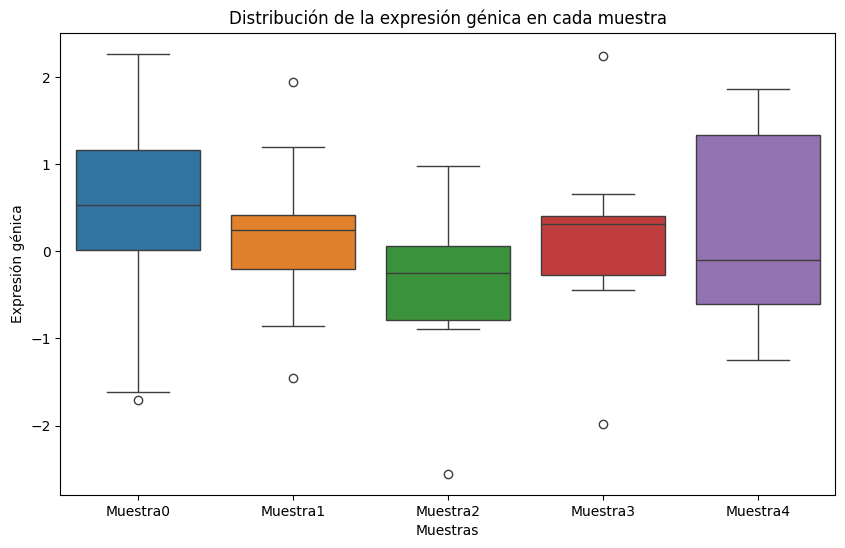

In [ ]:
# prompt: crear un boxplot para visualizar la distribucion de la expresión genica en cada muestra, los datos son del data frame df_test

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_test is your DataFrame and contains columns 'Muestra0', 'Muestra1', etc.
# Replace 'Muestra0' to 'Muestra4' with the actual column names in your df_test DataFrame.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_test[['Muestra0', 'Muestra1', 'Muestra2', 'Muestra3', 'Muestra4']])
plt.title('Distribución de la expresión génica en cada muestra')
plt.ylabel('Expresión génica')
plt.xlabel('Muestras')
plt.show()


In [ ]:
print (df_test)

  Unnamed: 0  Muestra0  Muestra1  Muestra2  Muestra3  Muestra4  Muestra5  \
0       Gen0  1.764052  0.400157  0.978738  2.240893  1.867558 -0.977278   
1       Gen1  0.950088 -0.151357 -0.103219  0.410599  0.144044  1.454274   
2       Gen2  0.761038  0.121675  0.443863  0.333674  1.494079 -0.205158   
3       Gen3  0.313068 -0.854096 -2.552990  0.653619  0.864436 -0.742165   
4       Gen4  2.269755 -1.454366  0.045759 -0.187184  1.532779  1.469359   
5       Gen5  0.154947  0.378163 -0.887786 -1.980796 -0.347912  0.156349   
6       Gen6  1.230291  1.202380 -0.387327 -0.302303 -1.048553 -1.420018   
7       Gen7 -1.706270  1.950775 -0.509652 -0.438074 -1.252795  0.777490   
8       Gen8 -1.613898 -0.212740 -0.895467  0.386902 -0.510805 -1.180632   
9       Gen9 -0.028182  0.428332  0.066517  0.302472 -0.634322 -0.362741   

   mean_row   min_row   max_row   q25_row   q50_row   q75_row  
0  1.450280  0.400157  2.240893  0.978738  1.764052  1.867558  
1  0.250031 -0.151357  0.950088 -0.

In [ ]:
# Transponer el DataFrame para que los genes estén en las columnas
df_genes = df_test[['Muestra0', 'Muestra1', 'Muestra2', 'Muestra3', 'Muestra4']].T
print (df_genes)

                 0         1         2         3         4         5  \
Muestra0  1.764052  0.950088  0.761038  0.313068  2.269755  0.154947   
Muestra1  0.400157 -0.151357  0.121675 -0.854096 -1.454366  0.378163   
Muestra2  0.978738 -0.103219  0.443863 -2.552990  0.045759 -0.887786   
Muestra3  2.240893  0.410599  0.333674  0.653619 -0.187184 -1.980796   
Muestra4  1.867558  0.144044  1.494079  0.864436  1.532779 -0.347912   

                 6         7         8         9  
Muestra0  1.230291 -1.706270 -1.613898 -0.028182  
Muestra1  1.202380  1.950775 -0.212740  0.428332  
Muestra2 -0.387327 -0.509652 -0.895467  0.066517  
Muestra3 -0.302303 -0.438074  0.386902  0.302472  
Muestra4 -1.048553 -1.252795 -0.510805 -0.634322  


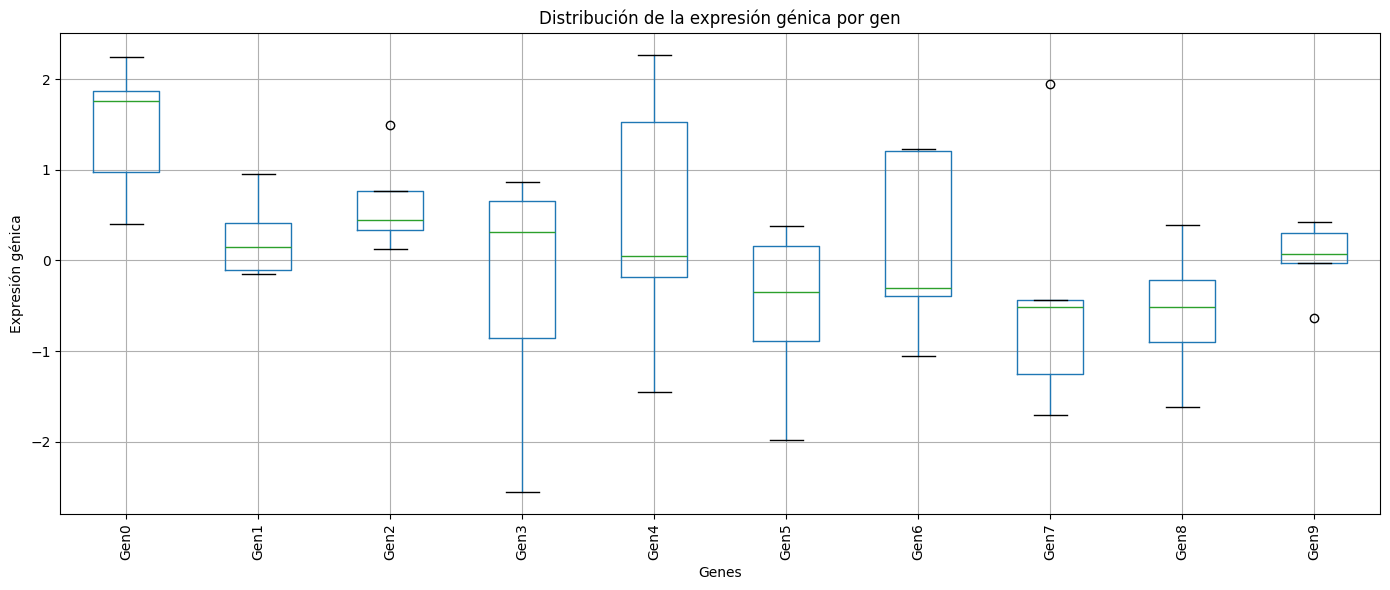

In [ ]:
import matplotlib.pyplot as plt

# Renombrar columnas para que cada una represente un gen (puedes usar índices si no hay nombres de genes)
df_genes.columns = [f'Gen{i}' for i in range(0, df_genes.shape[1])]

plt.figure(figsize=(14, 6))
df_genes.boxplot()
plt.title('Distribución de la expresión génica por gen')
plt.ylabel('Expresión génica')
plt.xlabel('Genes')
plt.xticks(rotation=90)  # Si tienes muchos genes, esto ayuda a leer los nombres
plt.tight_layout()
plt.show()

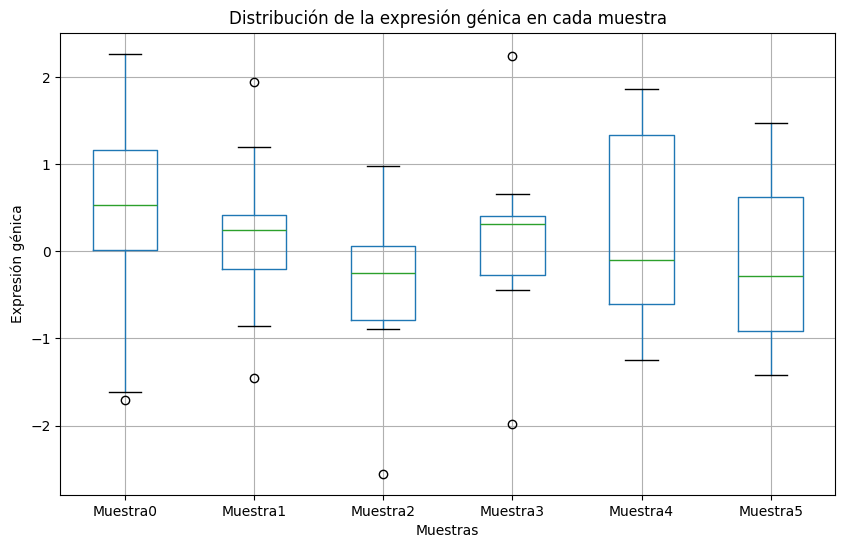

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_plot = pd.read_csv("expresion.csv")

plt.figure(figsize=(10, 6))
df_plot.boxplot()
plt.title('Distribución de la expresión génica en cada muestra')
plt.ylabel('Expresión génica')
plt.xlabel('Muestras')
plt.show()